<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <h1>Room Temperature Control with Fuzzy Logic</h1>
    <p>In this scenario, the goal is to control the room temperature by adjusting the air flow mixing. The system has two inputs: hot air flow and cold air flow, and one output: the voltage to the pump, which controls the mixing of hot and cold air flows.</p>
    <h2>System Operation</h2>
    <ol>
        <li><strong>Hot and Cold Air Flow Inputs:</strong> These represent the amount of hot and cold air flowing into the room, respectively. These inputs can be measured using sensors that detect the temperature of the air entering the room.</li>
        <li><strong>Voltage Output:</strong> This is the output of the system and represents the voltage applied to the pump that controls the mixing of hot and cold air flows. The voltage can vary between two extremes: V1 and V2. When the voltage is set to V1, maximum cold air flow is allowed, and when it's set to V2, maximum hot air flow is generated. Any voltage value between V1 and V2 results in a proportional mixing of hot and cold air flows.</li>
        <li><strong>Fuzzy Logic Control:</strong> Fuzzy logic can be used to control the voltage output based on the inputs of hot and cold air flows. Here's how it can be done:
            <ul>
                <li><strong>Fuzzification:</strong> The inputs (hot and cold air flows) are fuzzified into linguistic variables with membership functions representing their degrees of membership in different categories (e.g., low, medium, high).</li>
                <li><strong>Rule Base:</strong> Fuzzy rules are formulated to determine the relationship between the inputs and the output (voltage). These rules capture the expert knowledge or experience about how to adjust the voltage based on the inputs to achieve the desired room temperature.</li>
                <li><strong>Inference Engine:</strong> The fuzzy inference engine applies the fuzzy rules to the fuzzified inputs to determine the output (voltage). This involves computing the degree of activation of each rule and aggregating the results to obtain a fuzzy output.</li>
                <li><strong>Defuzzification:</strong> The fuzzy output is then defuzzified to obtain a crisp value for the voltage output. This can be done using methods like centroid defuzzification, which calculates the center of mass of the output membership functions.</li>
            </ul>
        </li>
    </ol>
    <p>By using fuzzy logic control, the system can adjust the voltage to the pump in real-time based on the inputs of hot and cold air flows, allowing for a flexible and adaptive control strategy that can respond to changes in room temperature conditions effectively.</p>
</body>
</html>


## Installing scikit-fuzzy Library

This command will download and install the scikit-fuzzy package from the Python Package Index (PyPI). Once installed, you can import and use scikit-fuzzy in your Python scripts for fuzzy logic applications.

In [1]:
!pip install scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894078 sha256=0119de475ea7efcbefc1136f11de2cd6bb3b1200122dcc35f7d55a3aefbba05e
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


## Importing Libraries

<!DOCTYPE html>
<html lang="en">
<body>
    <p><strong></strong> The code imports necessary libraries including NumPy, scikit-fuzzy, and Matplotlib. Here's how each library helps us:</p>
    <ul>
        <li><strong>NumPy:</strong> NumPy is used for numerical operations and array manipulations. It provides efficient tools for handling arrays and mathematical functions, which are essential for data manipulation in fuzzy logic control.</li>
        <li><strong>scikit-fuzzy:</strong> scikit-fuzzy is a Python library for fuzzy logic operations. It provides tools for fuzzy set theory, fuzzy inference systems, and fuzzy control, making it suitable for implementing fuzzy logic control systems.</li>
        <li><strong>Matplotlib:</strong> Matplotlib is a plotting library that allows us to visualize data and results. In the context of fuzzy logic control, Matplotlib can be used to create plots and graphs to analyze system behavior and performance.</li>
    </ul>
</body>
</html>

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

<!DOCTYPE html>
<html lang="en">
<body>
  <ul>
        <li><strong>scikit-fuzzy control submodule:</strong> This submodule provides functionality for creating and simulating fuzzy control systems. It includes tools for defining fuzzy variables, membership functions, rules, and control system simulations. By importing this submodule as ctrl, we can access its functionalities using a convenient shorthand notation.</li>
    </ul>
</body>
</html>


# Define fuzzy variables

<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
</head>
<body>
    <ol>
        <li><strong>target_temp:</strong> This fuzzy variable represents the target temperature in the system. It is defined as an Antecedent variable with a range from 0 to 100 degrees. This variable is used to fuzzify the input temperature values.</li>
        <li><strong>voltage:</strong> This fuzzy variable represents the voltage applied to control the system. It is defined as a Consequent variable with a range from 0 to 10 volts. Additionally, the defuzzify_method parameter is set to 'centroid', indicating that centroid defuzzification method will be used to convert the fuzzy output into a crisp value.</li>
    </ol>
    <p>To use centroid defuzzification method for the 'voltage' fuzzy variable, you would set the defuzzify_method parameter to 'centroid' when defining the Consequent variable. Centroid defuzzification method calculates the center of mass of the output membership functions to obtain a crisp output value.</p>
    <p>To use Sugeno fuzzy matching, you would define fuzzy rules that map input fuzzy variables to output fuzzy variables using if-then rules. These rules can be formulated based on expert knowledge or empirical data. The Sugeno method involves evaluating a weighted average of the output membership functions based on the input values and their corresponding rule strengths, resulting in a crisp output value.</p>
</body>
</html>


In [3]:
target_temp = ctrl.Antecedent(np.arange(0, 101, 1), 'target_temp')
voltage = ctrl.Consequent(np.arange(0, 11, 1), 'voltage', defuzzify_method='centroid')

# Define membership functions for target temperature (K) using sigmoid function

In [4]:
target_temp['low'] = fuzz.zmf(target_temp.universe, 15, 60)
target_temp['high'] = fuzz.smf(target_temp.universe, 15, 65)

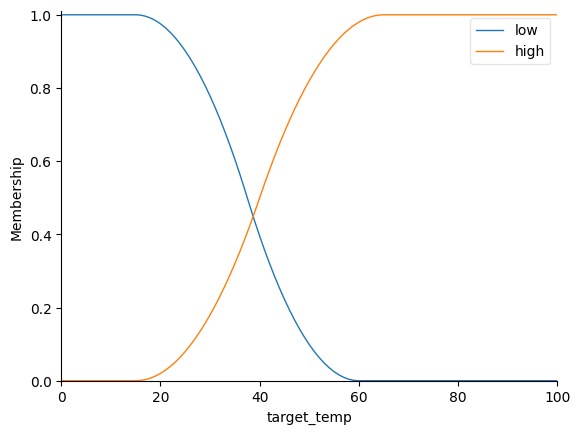

In [5]:
# Plot membership functions for visualization
target_temp.view()
plt.show()

# Define membership functions for voltage (V)

In [6]:
voltage['V1'] = fuzz.trimf(voltage.universe, [0, 0, 5])
voltage['V2'] = fuzz.trimf(voltage.universe, [5, 10, 10])

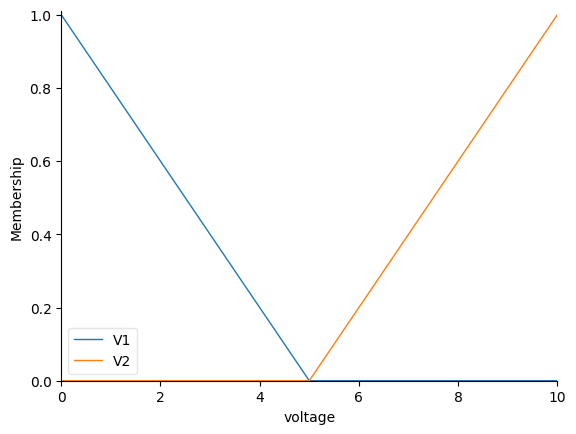

In [7]:
# Plot membership functions for visualization
voltage.view()
plt.show()

# Define the rules

In [8]:
rule1 = ctrl.Rule(target_temp['low'], voltage['V1'])
rule2 = ctrl.Rule(target_temp['high'], voltage['V2'])

# Create the control system


In [10]:
voltage_ctrl = ctrl.ControlSystem([rule1, rule2])
voltage_sim = ctrl.ControlSystemSimulation(voltage_ctrl)

# Function to simulate voltage based on target temperature and plot the steps

In [14]:
def simulate_voltage_and_plot(K):
    # Fuzzification
    voltage_sim.input['target_temp'] = K

    # Compute membership values for K
    mem_low = fuzz.interp_membership(target_temp.universe, target_temp['low'].mf, K)
    mem_high = fuzz.interp_membership(target_temp.universe, target_temp['high'].mf, K)

    # Visualize fuzzification
    target_temp.view(sim=voltage_sim)
    plt.axvline(x=K, color='r', linestyle='--', label=f'K={K}')
    plt.scatter([K], [mem_low], color='b', label=f'Membership Low={mem_low:.2f}')
    plt.scatter([K], [mem_high], color='g', label=f'Membership High={mem_high:.2f}')
    plt.title(f"Fuzzification of Target Temperature (K={K})")
    plt.xlabel('Temperature (K)')
    plt.ylabel('Membership')
    plt.legend()
    plt.show()

    # Compute the result to visualize the intermediate steps
    voltage_sim.compute()

    V = voltage_sim.output['voltage']

    # Visualize the fuzzy inference results
    voltage.view(sim=voltage_sim)
    plt.title(f"Fuzzy Inference of Voltage for Target Temperature (K={K})")
    plt.xlabel('Voltage (V)')
    plt.ylabel('Membership')

    # Annotate the plot with the V value
    plt.annotate(f'V = {V:.2f}', xy=(V, 0), xytext=(V, 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.05),
                 horizontalalignment='center', verticalalignment='bottom')

    plt.show()

    # Output the defuzzified result
    print(f"Target Temperature: {K} -> Voltage: {V}")

    return V

# Example simulation and plots

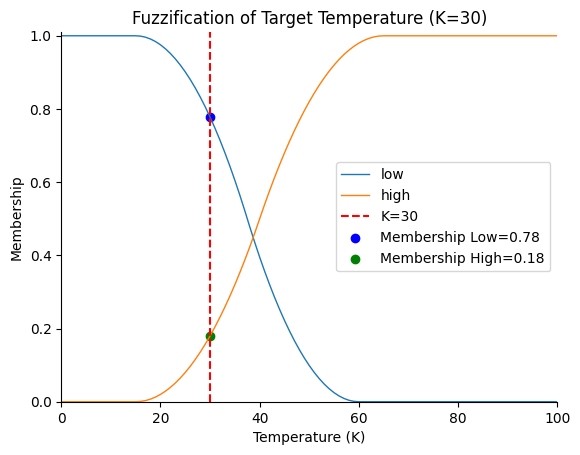

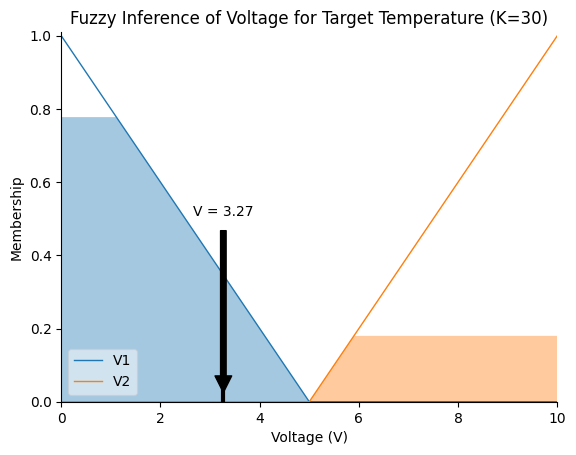

Target Temperature: 30 -> Voltage: 3.267563992660674


In [12]:
K = 30  # Example target temperature
V = simulate_voltage_and_plot(K)

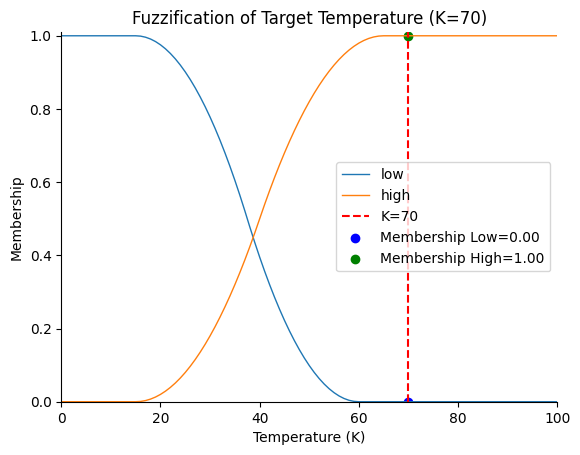

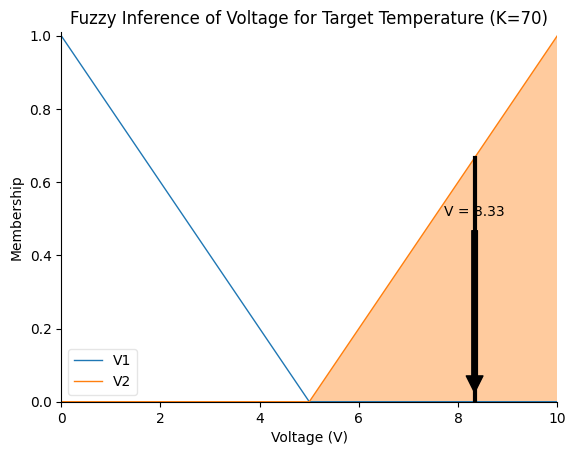

Target Temperature: 70 -> Voltage: 8.333333333333334


In [16]:
K2 = 70  # Another example target temperature
V2 = simulate_voltage_and_plot(K2)